# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Moch Dani Kurniawan Sugiarto
- Email: danisugiartolaptop12@gmail.com
- Id Dicoding:a129ybm285


## Persiapan

### Menyiapkan library yang dibutuhkan

Memasukan dataset yang telah di sediakan yaitu employee_data.csv lalu menambahkan libary yang akan di gunakan

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter, LGBMClassifier

### Menyiapkan data yang akan digunakan

In [2]:
#load dataset yang akan digunakan sebanyak 20 sample data
df = pd.read_csv("employee_data.csv")
df.sample(20)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1308,1309,50,1.0,Travel_Frequently,959,Sales,1,4,Other,1,...,4,80,0,5,4,3,0,0,0,0
429,430,24,0.0,Non-Travel,1269,Research & Development,4,1,Life Sciences,1,...,4,80,0,6,2,2,5,2,3,4
564,565,58,1.0,Travel_Rarely,601,Research & Development,7,4,Medical,1,...,4,80,0,31,0,2,10,9,5,9
164,165,55,1.0,Travel_Rarely,436,Sales,2,1,Medical,1,...,3,80,0,12,3,2,9,7,7,3
626,627,27,0.0,Travel_Rarely,1157,Research & Development,17,3,Technical Degree,1,...,4,80,1,6,3,2,5,2,1,1
1210,1211,21,1.0,Travel_Rarely,156,Sales,12,3,Life Sciences,1,...,4,80,0,1,0,3,1,0,0,0
326,327,45,1.0,Travel_Frequently,306,Sales,26,4,Life Sciences,1,...,4,80,2,5,4,3,1,1,0,0
986,987,56,1.0,Travel_Rarely,441,Research & Development,14,4,Life Sciences,1,...,1,80,3,7,2,3,5,4,4,3
130,131,41,NaN,Travel_Rarely,930,Sales,3,3,Life Sciences,1,...,3,80,1,14,5,3,5,4,0,4
1387,1388,33,NaN,Non-Travel,1283,Sales,2,3,Marketing,1,...,4,80,0,13,2,2,11,7,1,7


## Data Understanding

In [3]:
# Mengecek apakah ada data yang NaN/Null
print("\nInformasi Data yang NULL:")
print(df.isnull().values.any())
print("\nMissing Values:")
print(df.isna().sum())

#Cek ukuran data set

print("\nUkuran dataset:")
print(df.shape)


Informasi Data yang NULL:
True

Missing Values:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear  

Attrition memiliki nilai null sebanyak 412 dan ukuran dataset sebanyak 1470 dengan kolom 35


In [4]:
# Mengecek Datatype tiap kolom berserta non-null kolom
print("\nInformasi Data:")
df.info()


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int6

In [5]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


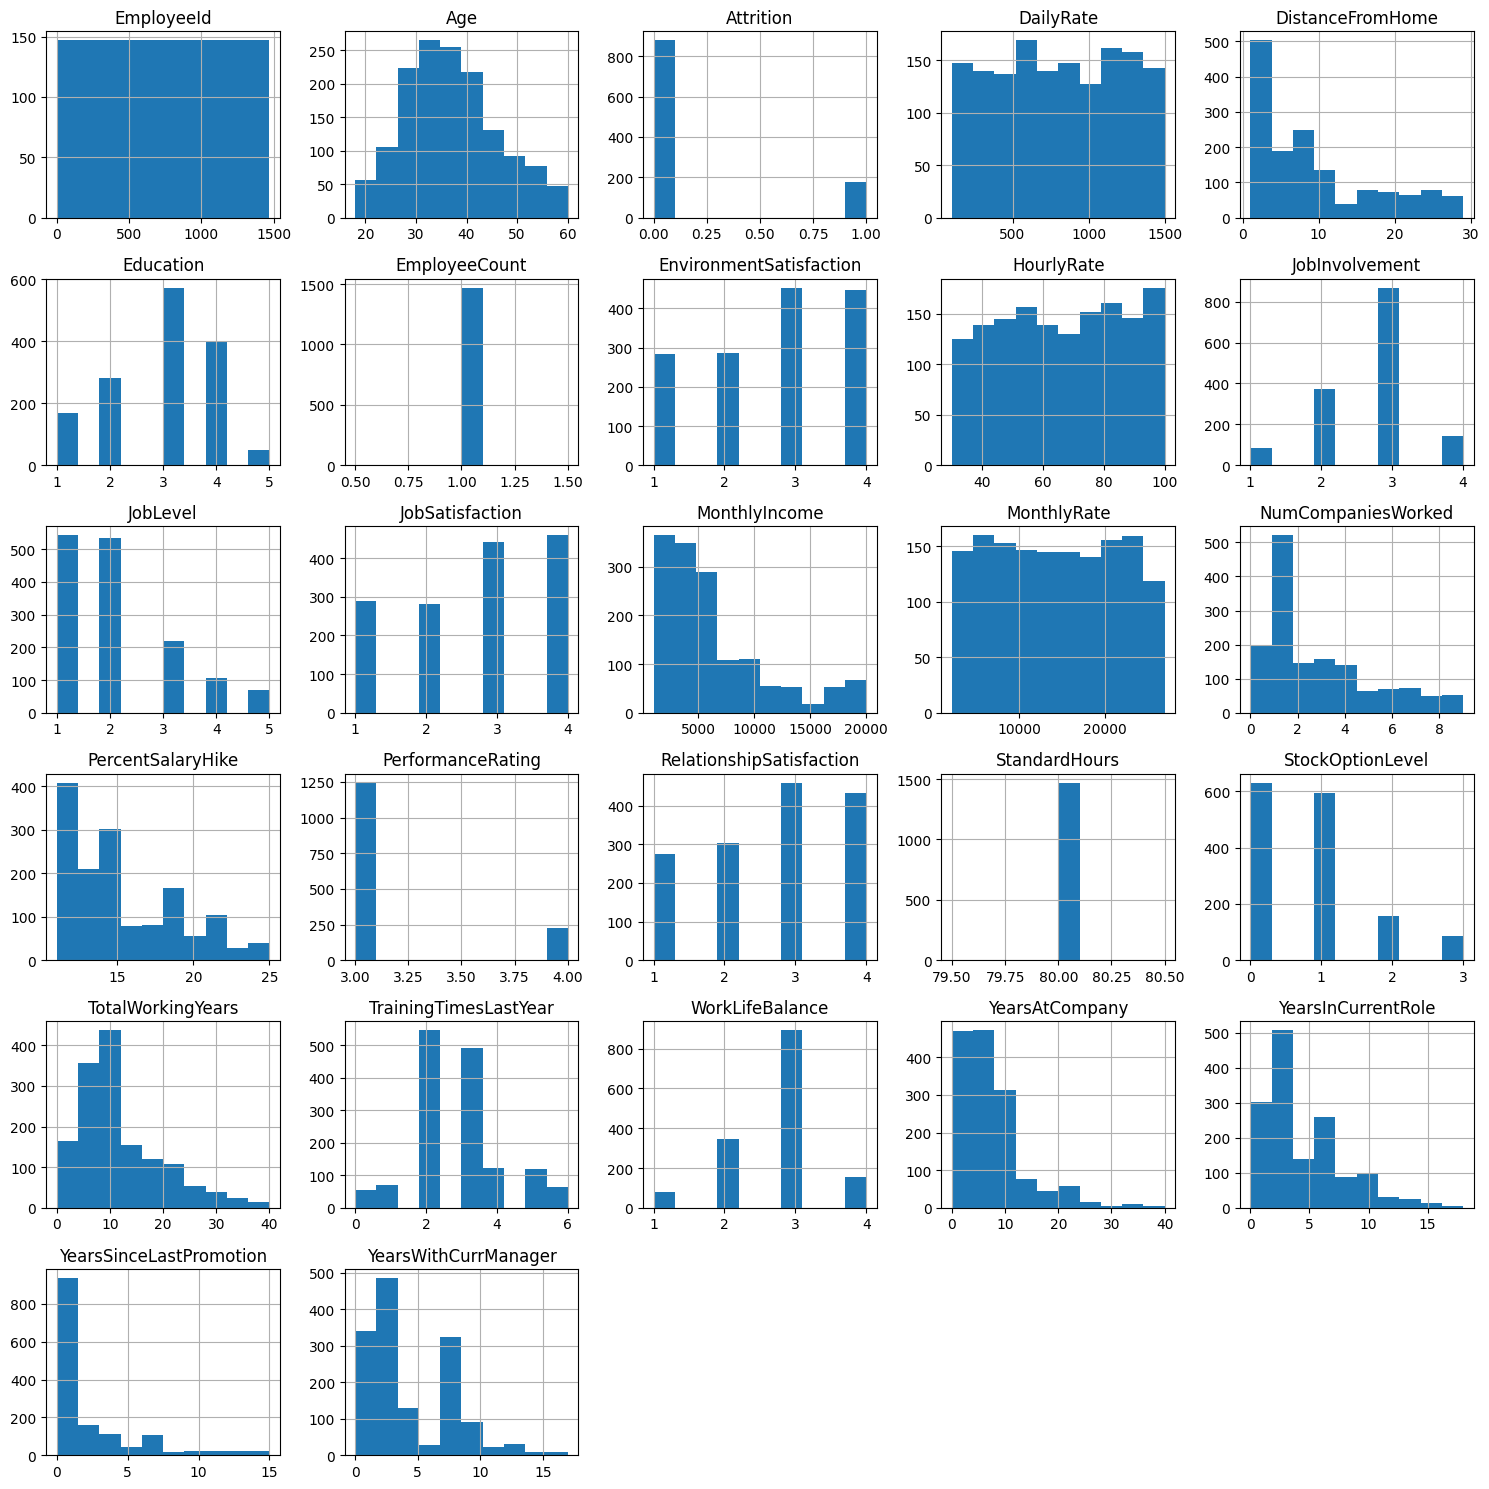

In [6]:
#Visual per kolom berdasarkan isi data perkolomnya
df.hist(figsize=(15,15))
plt.tight_layout()

In [7]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.duplicated().sum()

np.int64(0)

tidak terdapat data duplikated pada di setiap barisnya

## Data Preparation / Preprocessing

### Handling Missing Value


In [9]:
df['Attrition'] = df['Attrition'].fillna(0)

In [10]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


### Feature Engineering

#### Umur


In [11]:
def Generation(x):
    if x['Age'] >= 18 and x['Age'] <= 27:
        kelompok = 'GenZ'
    elif x['Age'] >= 28 and x['Age'] <= 42:
        kelompok = 'Milenial'
    else:
        kelompok  = 'GenX'
    return kelompok

df['Age_group'] = df.apply(lambda x: Generation(x), axis=1)

#### DistanceFromHome

In [12]:
def distance(x):
    if x['DistanceFromHome'] >= 1 and x['DistanceFromHome'] <= 5:
        kelompok = 'Walking_distance'
    elif x['DistanceFromHome'] >= 6 and x['DistanceFromHome'] <= 25:
        kelompok = 'Intermediate_distance'
    else:
        kelompok  = 'Great_distance'
    return kelompok

df['DistanceGroup'] = df.apply(lambda x: distance(x), axis=1)

####Employe Personal

In [13]:
# Analisis personal: Age_group dan DistanceGroup yang paling sering mengalami attrition
df_personal = df[df['Attrition'] == 1]  # ambil yang keluar

# Hitung distribusi
age_out = df_personal['Age_group'].value_counts()
distance_out = df_personal['DistanceGroup'].value_counts()

print("Berdasarkan kepribadian karyawan (usia dan jarak tempat tinggal):")
print(f"- Kelompok usia yang paling banyak keluar: {age_out.idxmax()} ({age_out.max()} orang)")
print(f"- Jarak dari rumah yang paling banyak keluar: {distance_out.idxmax()} ({distance_out.max()} orang)")


Berdasarkan kepribadian karyawan (usia dan jarak tempat tinggal):
- Kelompok usia yang paling banyak keluar: Milenial (99 orang)
- Jarak dari rumah yang paling banyak keluar: Intermediate_distance (97 orang)


In [14]:
# Analisis status pernikahan karyawan yang keluar
marital_status_map = {
    'Single': 'Single',
    'Married': 'Married',
    'Divorced': 'Divorced'
}
df['MaritalStatus'] = df['MaritalStatus'].map(marital_status_map)

# Ambil data karyawan yang keluar
attrition_marital = df[df['Attrition'] == 1]

# Hitung jumlah berdasarkan status pernikahan
married_status_count = attrition_marital['MaritalStatus'].value_counts()

# Tampilkan hasil analisis deskriptif
print("Berdasarkan status pernikahan, karyawan yang paling banyak keluar adalah:")
for status, count in married_status_count.items():
    print(f"- {status}: {count} orang")



Berdasarkan status pernikahan, karyawan yang paling banyak keluar adalah:
- Single: 94 orang
- Married: 62 orang
- Divorced: 23 orang


In [15]:
# Mapping
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}
df['Education'] = df['Education'].map(education_map)

job_level_mapping = {
    1: 'Staff',
    2: 'Junior Supervisor',
    3: 'Senior Supervisor',
    4: 'Junior Manager',
    5: 'Senior Manager'
}
df['JobLevel'] = df['JobLevel'].map(job_level_mapping)

### drop data yang tidak diperlukan

In [16]:
df.drop(['StandardHours','EmployeeCount', 'Over18'],axis=1,inplace=True)


## Exploratory Data Analysis


In [17]:

df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df['Attrition'].value_counts()

,count
Attrition,
0,1291
1,179


Jika Attrition 1 = Banyak karyawan yang keluar dan 0 = Karyawan yang bertahan

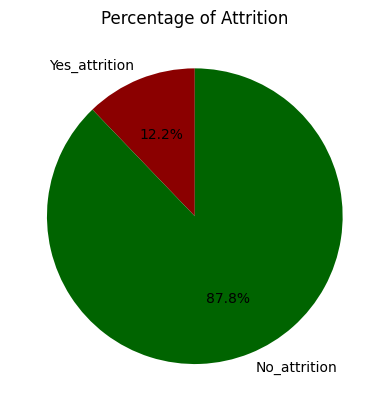

In [18]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition'] == 0]

attrition_count = len(attrition)
no_attrition_count = len(no_attrition)

categories = ['Yes_attrition', 'No_attrition']
counts = [attrition_count, no_attrition_count]

plt.title('Percentage of Attrition')
plt.pie(counts, labels = categories, startangle = 90, autopct='%1.1f%%', colors=["#8B0000", "#006400"])
plt.show()

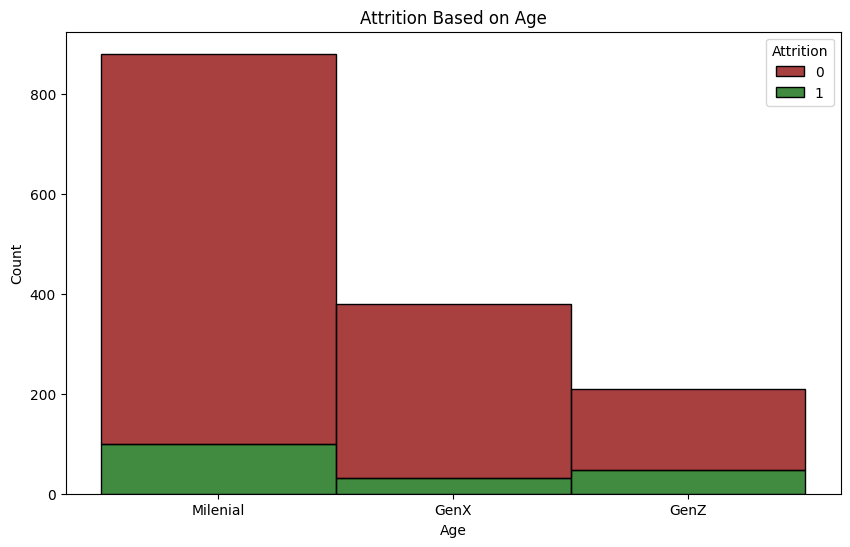

In [19]:
colors=["#8B0000", "#006400"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age_group", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Banyak Karyawan Milineial yang keluar dari perusahanan lalu Karyawan Gen Z yang masih sedikit untuk keluar

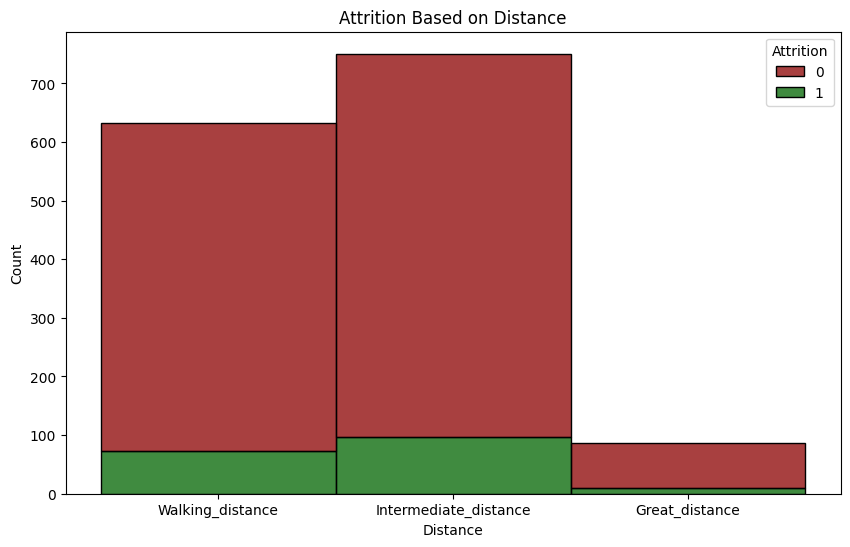

In [20]:
colors=["#8B0000", "#006400"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="DistanceGroup", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Distance")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.show()

Intermidate atau jarak yang paling jauh paling banyak untuk mengundurkan diri

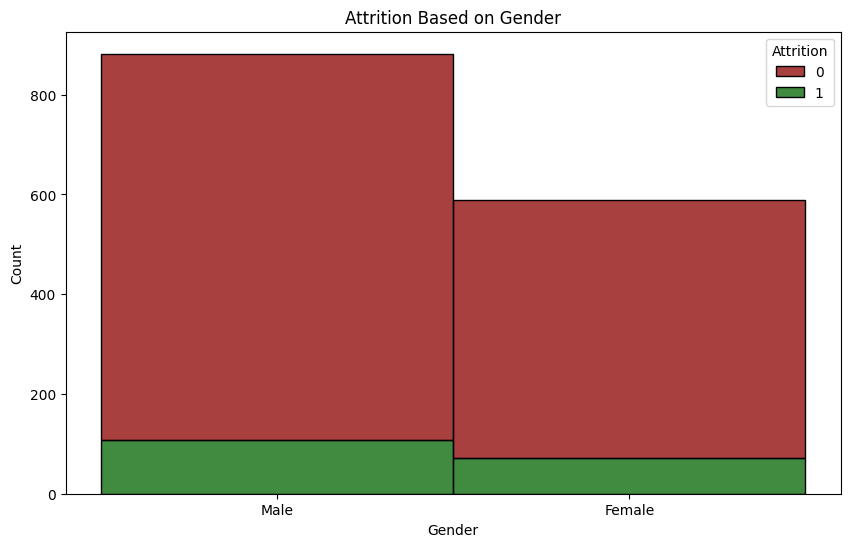

In [21]:
colors=["#8B0000", "#006400"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Gender", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Gender laki laki paling banyak keluar untuk resign

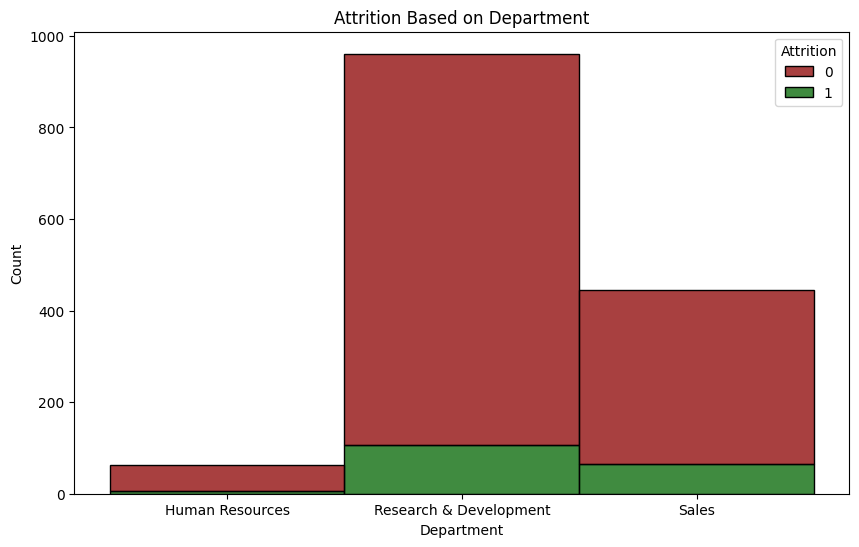

In [22]:
colors=["#8B0000", "#006400"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Department", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

Karyawan Research dan Development department paling banyak keluar dari perusahan

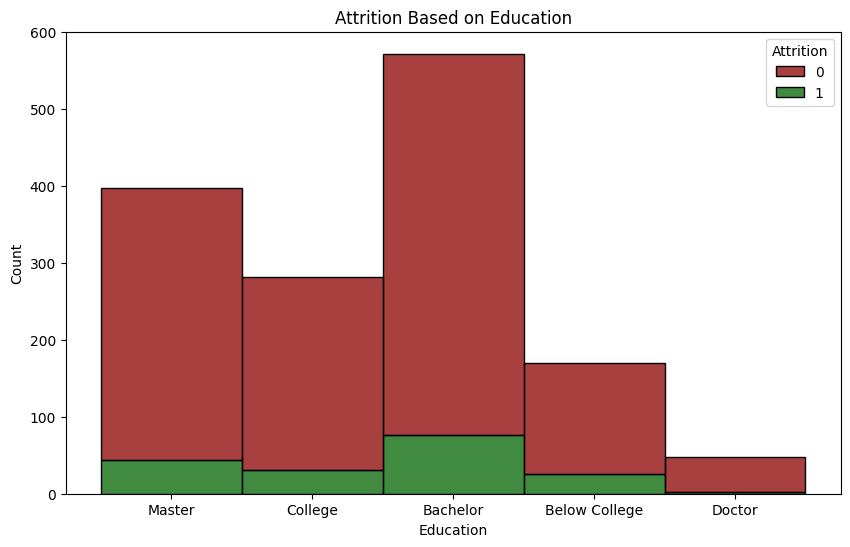

In [23]:
colors=["#8B0000", "#006400"]

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Education", hue="Attrition", multiple="stack", palette=colors)
plt.title("Attrition Based on Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

Pendidikan Bachelor paling banyak untuk mengundurkan diri

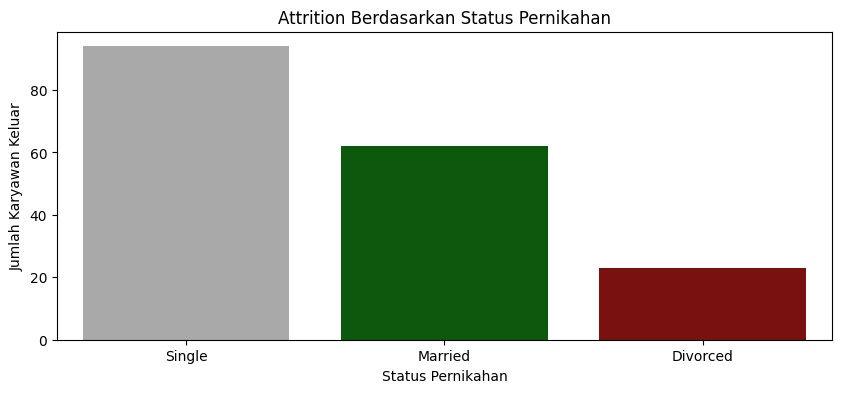

In [24]:
colors=["#A9A9A9", "#006400","#8B0000"]

# Visualisasi bar chart
plt.figure(figsize=(10,4))
sns.countplot(x='MaritalStatus', data=attrition_marital, order=married_status_count.index, palette= colors)
plt.title("Attrition Berdasarkan Status Pernikahan")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah Karyawan Keluar")
plt.show()




Paling banyak untuk mengundurkan diri yaitu karyawan single



## Modeling

In [25]:
# Filter Categorical Features
cats = df.select_dtypes(exclude=['int32','int64','float32','float64'])
cats.head()

,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,OverTime,Age_group,DistanceGroup
0,Travel_Frequently,Human Resources,Master,Other,Male,Staff,Human Resources,Married,Yes,Milenial,Walking_distance
1,Travel_Rarely,Research & Development,College,Medical,Female,Junior Supervisor,Healthcare Representative,Married,No,Milenial,Intermediate_distance
2,Travel_Rarely,Research & Development,Master,Life Sciences,Male,Staff,Research Scientist,Married,Yes,GenX,Walking_distance
3,Travel_Frequently,Sales,Bachelor,Marketing,Female,Junior Manager,Sales Executive,Married,No,Milenial,Great_distance
4,Travel_Rarely,Research & Development,Master,Medical,Female,Staff,Research Scientist,Married,No,Milenial,Walking_distance


In [26]:
cats.nunique()


,0
BusinessTravel,3
Department,3
Education,5
EducationField,6
Gender,2
JobLevel,5
JobRole,9
MaritalStatus,3
OverTime,2
Age_group,3


In [27]:


label_encoder=LabelEncoder()
columns_to_encode = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
                     'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime', 'Age_group',
                     'DistanceGroup']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [28]:

df_new = df.drop(['YearsInCurrentRole' , 'YearsSinceLastPromotion', 'YearsWithCurrManager'],axis=1)
df_new.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Age_group,DistanceGroup
0,1,38,0,1,1444,0,1,4,4,4,...,11,3,2,1,7,2,3,6,2,2
1,2,37,1,2,1141,1,11,2,3,1,...,15,3,1,0,15,2,1,1,2,1
2,3,51,1,2,1323,1,4,4,1,1,...,12,3,3,3,18,2,4,10,0,2
3,4,42,0,1,555,2,26,0,2,3,...,14,3,4,1,23,2,4,20,2,0
4,5,40,0,2,1194,1,2,4,3,3,...,14,3,2,3,20,2,3,5,2,2


In [29]:
X=np.array(df_new.drop(['Attrition'],axis=1))
y=np.array(df_new['Attrition'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1176, 30)
(294, 30)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Logistic Regression


In [32]:
# Insialisasi model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(class_weight='balanced')

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()


accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():

    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predictions = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

In [33]:

# Menampilkan evaluasi setiap model

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.731293,0.65625,0.235955,0.347107
Decision Trees,0.816327,0.09375,0.107143,0.100000
Random Forest,0.891156,0.03125,0.500000,0.058824
Naive Bayes,0.857143,0.31250,0.333333,0.322581
K-Nearest Neighbor,0.884354,0.03125,0.250000,0.055556


Pada hasil evaluasi, terlihat bahwa model Random Forest memiliki nilai akurasi tertinggi dengan accuracy 0.89 sehingga model tersebut yang akan digunakan.






Memilih Model Random Forest (Klasifikasi)


#### Membuat Model Random Forest


In [34]:

# Memanggil model Random Forest
rf = RandomForestClassifier()

In [35]:

# Melakukan training model
rfmodel = rf.fit(X_train,y_train)
#print(rdf_model)

# Melakukan prediksi dengan training model
y_train_rf = rfmodel.predict(X_train)
print(y_train_rf.shape)

(1176,)


In [36]:

# Melakukan prediksi dengan testing model
y_test_rf = rfmodel.predict(X_test)
print(y_test_rf.shape)

(294,)


## Evaluation

### Melakukan Evaluasi Model Random Forest


In [37]:

# classification report - training model
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_rf))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00       147

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



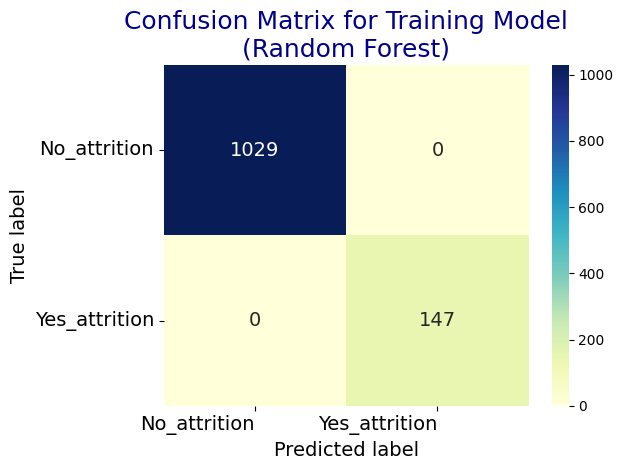

In [38]:

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_rf)), ('No_attrition', 'Yes_attrition'),('No_attrition', 'Yes_attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## Evaluasi Testing Model


In [39]:

# classification report - testing model
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_rf))


Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       262
           1       0.75      0.09      0.17        32

    accuracy                           0.90       294
   macro avg       0.82      0.54      0.56       294
weighted avg       0.88      0.90      0.86       294



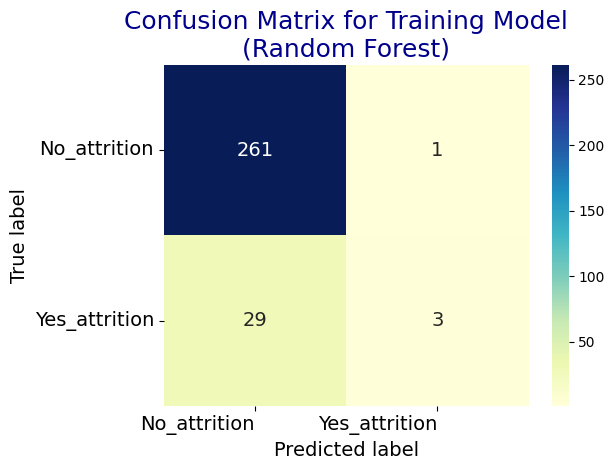

In [40]:

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_rf)), ('No_attrition', 'Yes_attrition'), ('No_attrition', 'Yes_attrition'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

## Hyperparameter Tunning


In [41]:
#List Hyperparameters yang akan diuji
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf = GridSearchCV(estimator = rfmodel, param_grid = param_grid,
                          cv = 2, n_jobs = -1, verbose = 2)

#Fitting Model
best_model = clf.fit(X_train,y_train)

#Nilai hyperparameters terbaik
print('Best parameter        :', best_model.best_estimator_)

#Prediksi menggunakan model baru
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Check performa dari model
# classification report - training model
print('\nClassification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

# classification report - testing model
print('\nClassification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred))

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter        : RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=5,
                       min_samples_split=10)

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1029
           1       0.94      0.12      0.21       147

    accuracy                           0.89      1176
   macro avg       0.92      0.56      0.57      1176
weighted avg       0.89      0.89      0.85      1176


Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       262
           1       0.00      0.00      0.00        32

    accuracy                           0.89       294
   macro avg       0.45      0.50      0.47       294
weighted avg       0.79      0.89      0.84       294



In [42]:
import joblib

# Melakukan export model
joblib.dump(best_model, "Model.joblib")

['Model.joblib']

In [43]:
!pip freeze > requirements.txt


In [44]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [45]:
import numpy as np
print(np.__version__)


2.0.2
